<a href="https://colab.research.google.com/github/DarkLord-13/Machine-Learning-01/blob/main/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of Lasso regression is to find a model that fits the data well while keeping the number of features (or predictor variables) as small as possible.

Lasso regression works by adding a penalty term to the cost function of the linear regression model. The penalty term is proportional to the absolute value of the coefficients of the model, which encourages small values for the coefficients and leads to sparse solutions. In other words, the Lasso penalty shrinks the less important features to zero, effectively eliminating them from the model.

Lasso regression is particularly useful when dealing with high-dimensional datasets, where the number of features is much larger than the number of samples. In this case, Lasso regression can help to identify the most important features and reduce the risk of overfitting.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
dataset = pd.read_csv('/content/car data.csv')

In [ ]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
dataset = dataset.drop(columns='Car_Name') # dropping car name, as its irrelevant to us

#Label Encoding
Assigning numerical values to categorical dataset such as Seller_Type, Transmission, etc

In [ ]:
dataset['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
dataset['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [ ]:
dataset['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [ ]:
dataset = dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}, 'Seller_Type':{'Dealer':0, 'Individual':1}, 'Transmission':{'Manual':0, 'Automatic':1}})

In [ ]:
x = dataset.drop(columns=['Selling_Price'], axis=1)
y = dataset['Selling_Price']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=2, test_size=0.1)

Model Training
1. Linear Regression

In [ ]:
linreg = LinearRegression()

In [ ]:
linreg.fit(x_train, y_train)

LinearRegression()

In [ ]:
x_train_prediction = linreg.predict(x_train)
acc_score1 = metrics.r2_score(y_train, x_train_prediction)

x_test_prediction = linreg.predict(x_test)
acc_score2 = metrics.r2_score(y_test, x_test_prediction)

print("training accuracy",acc_score1)
print("test accuracy",acc_score2)

training accuracy 0.8799451660493711
test accuracy 0.8365766715027051


Visualizing the actual prices vs predicted prices

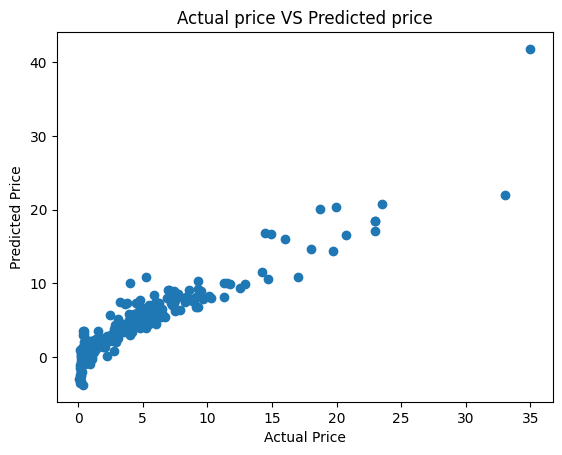

In [ ]:
plt.scatter(y_train, x_train_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual price VS Predicted price')
plt.show()

# the plots are very close to each other, therefore the prediction is good

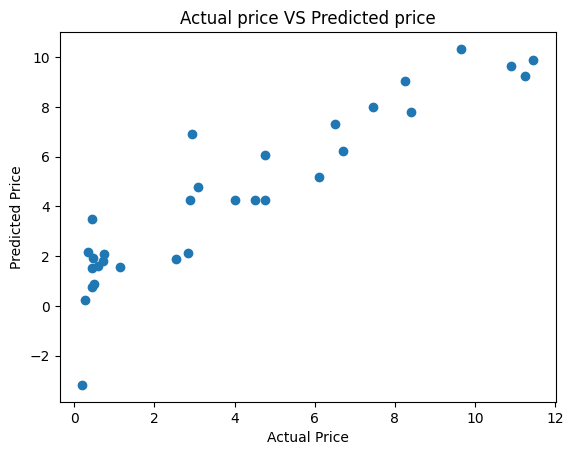

In [ ]:
plt.scatter(y_test, x_test_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual price VS Predicted price')
plt.show()
# this is not as good as training data scatter plot but still good 

2. Lasso Regression

In [ ]:
lassreg = Lasso()

In [ ]:
lassreg.fit(x_train, y_train)

Lasso()

In [ ]:
x_train_prediction = lassreg.predict(x_train)
acc_score1 = metrics.r2_score(y_train, x_train_prediction)

x_test_prediction = lassreg.predict(x_test)
acc_score2 = metrics.r2_score(y_test, x_test_prediction)

print("training accuracy",acc_score1)
print("test accuracy",acc_score2)

training accuracy 0.8427856123435794
test accuracy 0.8709167941173195


Visualizing the actual prices vs predicted prices

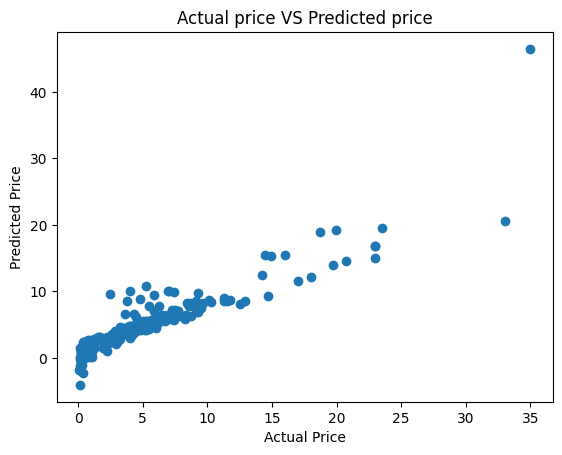

In [ ]:
plt.scatter(y_train, x_train_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual price VS Predicted price')
plt.show()

# the plots are very close to each other, therefore the prediction is good

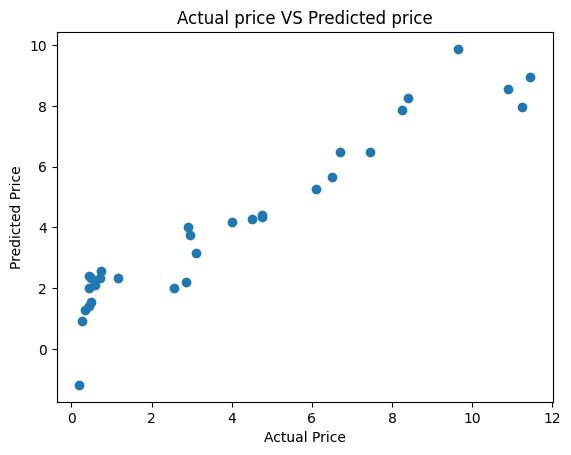

In [ ]:
plt.scatter(y_test, x_test_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual price VS Predicted price')
plt.show()
# this is not as good as training data scatter plot but still good 

In [ ]:
# both the models are good, but Lasso is a bit better

Prediction System

In [ ]:
x_test.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
99,2010,20.450,50024,1,0,0,0
161,2014,0.826,23000,0,1,0,0
89,2014,6.760,40000,0,0,0,0
30,2012,5.980,51439,1,0,0,0
232,2015,14.790,12900,0,0,1,0


In [ ]:
y_test.head()

99      9.65
161     0.45
89      4.75
30      3.10
232    11.45
Name: Selling_Price, dtype: float64

In [ ]:
input_data = (2010,20.450,50024,1,0,0,0)  # should predict 9.65
input_data = np.array(input_data)
input_data = input_data.reshape(1, -1)
prediction_using_linearregression = linreg.predict(input_data)
prediction_using_lasso = lassreg.predict(input_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [ ]:
print("LinearRegression:",prediction_using_linearregression)
print("Lasso:",prediction_using_lasso)

LinearRegression: [10.32892855]
Lasso: [9.87888122]
